In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
pd.set_option('display.max_columns', 90)



%matplotlib inline

In [23]:
df= pd.read_csv('V1_Sept_2020_OHS_msha_accident_20200829-0.csv')
df.head()

,mine_id,cntctr_id,subunit_cd,subunit_desc,ai_dt,inj_degr_desc,ai_class_desc,ai_occ_desc,ai_acty_desc,exper_tot_calc,exper_mine_calc,exper_job_calc,ai_narr,controller_id,controller_name,operator_id,operator_name,document_no,cal_yr,cal_qtr,fiscal_yr,fiscal_qtr,accident_time,degree_injury_cd,fips_state_cd,ug_location_cd,ug_location,ug_mining_method_cd,ug_mining_method,mining_equip_cd,mining_equip,equip_mfr_cd,equip_mfr_name,equip_model_no,shift_begin_time,classification_cd,accident_type_cd,accident_type,no_injuries,occupation_cd,activity_cd,injury_source_cd,injury_source,nature_injury_cd,nature_injury,inj_body_part_cd,inj_body_part,schedule_charge,days_restrict,days_lost,trans_term,return_to_work_dt,immed_notify_cd,immed_notify,invest_begin_dt,closed_doc_no,coal_metal_ind,load_dt,ai_year,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
0,Mine ID,Contractor ID,Subunit Code,Subunit Code Description,Accident Date,Degree of Injury Code Description,Accident Classification Description,Occupation Code Description,Miner Activity Code Description,Total Experience,Mine Experience,Job Experience,Accident Narrative,Controller ID,Controller Name,Operator ID,Operator Name,Document Number,Calendar Year,Calendar Quarter,Fiscal Year,Fiscal Quarter,accident Time,Degree of Injury Code,Fips State Code,Under Ground Location Code,Under Ground Location Code Description,Under Ground Mining Method Code,Under Ground Mining Method Code Description,Mining Equipment Code,Mining Equipment Code Description,Equipment Manufacturer Code,Equipment Manufacturer Name,Equipment Manufacturer Model Number,Shift Begin Time,Accident Classification Code,Accident Type Code,Accident Type Code Description,Number of Injuries,Occupation Code,Miner Activity Code,Injury Source Code,Injury Source Description,Nature of Injury Code,Nature of Injury Code Description,Injured Body Part Code,Injured Body Part Code Description,Schedule Charge,Days Restricted,Days Lost,Transferred or Terminated,Return to Work Date,Immediately Notify Code,Immediately Notify Code Description,Investigation Begin Date,Closed Document Number,Coal Metal Indicator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,NaN,30,MILL OPERATION/PREPARATION PLANT,5/10/11,DAYS RESTRICTED ACTIVITY ONLY,SLIP OR FALL OF PERSON,"Maintenance man, Mechanic, Repair/Serviceman,...",Getting on or off equipment,12.6,12.6,2.23,Employee was stepping down from the operator p...,41044,Lhoist Group,L13586,"Lhoist North America of Alabama, LLC",2.20E+11,2011,4,2012,1,1530,5,1,?,NO VALUE FOUND,?,NO VALUE FOUND,14,"Crane, Cherry picker, Lift basket, Scissor tru...",119,Not on this list,1568,700,18,30,Over-exertion NEC,1,304,23,117,GROUND,330,"SPRAIN,STRAIN RUPT DISC",520,ANKLE,0,5,0,N,13-10-2011,?,NO VALUE FOUND,NaN,NaN,M,2020-08-29 01:00:21 EDT,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100003,NaN,30,MILL OPERATION/PREPARATION PLANT,10/3/08,OCCUPATNAL ILLNESS NOT DEG 1-6,DISORDERS (REPEATED TRAUMA),Pumper,Unknown,2,2,2,Employee noticed pain and swelling in his righ...,41044,Lhoist Group,L13586,"Lhoist North America of Alabama, LLC",2.20E+11,2008,1,2008,2,1800,7,1,?,NO VALUE FOUND,?,NO VALUE FOUND,?,NO VALUE FOUND,?,NO VALUE FOUND,NaN,700,31,30,Over-exertion NEC,1,327,99,127,"MISCELLANEOUS,NEC",270,"JOINT,TENDON,MUSCL INFLAM",320,WRIST,0,0,0,N,11/3/08,?,NO VALUE FOUND,NaN,NaN,M,2020-08-29 01:00:21 EDT,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100003,FW4,30,MILL OPERATION/PREPARATION PLANT,4/8/97,DAYS AWAY FROM WORK ONLY,POWERED HAULAGE,"Electrician, Lineman",Supervise,0.57,0.57,16,NaN,M05293,Chemical Lime Company,L13586,"Lhoist North America of Alabama, LLC",2.20E+11,1997,3,1997,4,1300,3,1,?,NO VALUE FOUND,?,NO VALUE FOUND,71,"Machine, NEC - Wheelbarrow, Well drilling Rig,...",0,Not Reported,?,630,12,5,Struck by flying object,1,302,87,92,PULVERIZED MINERAL (DUST),390,"OTHER INJURY,NEC",130,EYE(S) OPTIC NERVE/VISON,NaN,NaN,1,N,6/8/97,13,NOT MARKED,NaN,NaN,M,2020-08-29 01:00:21 EDT,1997,NaN,NaN,NaN,NaN,

In [24]:
##drop 1st row from dataframe
update_df = df.drop([0])
update_df.head()

,mine_id,cntctr_id,subunit_cd,subunit_desc,ai_dt,inj_degr_desc,ai_class_desc,ai_occ_desc,ai_acty_desc,exper_tot_calc,exper_mine_calc,exper_job_calc,ai_narr,controller_id,controller_name,operator_id,operator_name,document_no,cal_yr,cal_qtr,fiscal_yr,fiscal_qtr,accident_time,degree_injury_cd,fips_state_cd,ug_location_cd,ug_location,ug_mining_method_cd,ug_mining_method,mining_equip_cd,mining_equip,equip_mfr_cd,equip_mfr_name,equip_model_no,shift_begin_time,classification_cd,accident_type_cd,accident_type,no_injuries,occupation_cd,activity_cd,injury_source_cd,injury_source,nature_injury_cd,nature_injury,inj_body_part_cd,inj_body_part,schedule_charge,days_restrict,days_lost,trans_term,return_to_work_dt,immed_notify_cd,immed_notify,invest_begin_dt,closed_doc_no,coal_metal_ind,load_dt,ai_year,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
1,100003,NaN,30,MILL OPERATION/PREPARATION PLANT,5/10/11,DAYS RESTRICTED ACTIVITY ONLY,SLIP OR FALL OF PERSON,"Maintenance man, Mechanic, Repair/Serviceman,...",Getting on or off equipment,12.6,12.6,2.23,Employee was stepping down from the operator p...,41044,Lhoist Group,L13586,"Lhoist North America of Alabama, LLC",2.20E+11,2011,4,2012,1,1530,5,1,?,NO VALUE FOUND,?,NO VALUE FOUND,14,"Crane, Cherry picker, Lift basket, Scissor tru...",119,Not on this list,1568,700,18,30,Over-exertion NEC,1,304,23,117,GROUND,330,"SPRAIN,STRAIN RUPT DISC",520,ANKLE,0,5,0,N,13-10-2011,?,NO VALUE FOUND,NaN,NaN,M,2020-08-29 01:00:21 EDT,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100003,NaN,30,MILL OPERATION/PREPARATION PLANT,10/3/08,OCCUPATNAL ILLNESS NOT DEG 1-6,DISORDERS (REPEATED TRAUMA),Pumper,Unknown,2,2,2,Employee noticed pain and swelling in his righ...,41044,Lhoist Group,L13586,"Lhoist North America of Alabama, LLC",2.20E+11,2008,1,2008,2,1800,7,1,?,NO VALUE FOUND,?,NO VALUE FOUND,?,NO VALUE FOUND,?,NO VALUE FOUND,NaN,700,31,30,Over-exertion NEC,1,327,99,127,"MISCELLANEOUS,NEC",270,"JOINT,TENDON,MUSCL INFLAM",320,WRIST,0,0,0,N,11/3/08,?,NO VALUE FOUND,NaN,NaN,M,2020-08-29 01:00:21 EDT,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100003,FW4,30,MILL OPERATION/PREPARATION PLANT,4/8/97,DAYS AWAY FROM WORK ONLY,POWERED HAULAGE,"Electrician, Lineman",Supervise,0.57,0.57,16,NaN,M05293,Chemical Lime Company,L13586,"Lhoist North America of Alabama, LLC",2.20E+11,1997,3,1997,4,1300,3,1,?,NO VALUE FOUND,?,NO VALUE FOUND,71,"Machine, NEC - Wheelbarrow, Well drilling Rig,...",0,Not Reported,?,630,12,5,Struck by flying object,1,302,87,92,PULVERIZED MINERAL (DUST),390,"OTHER INJURY,NEC",130,EYE(S) OPTIC NERVE/VISON,NaN,NaN,1,N,6/8/97,13,NOT MARKED,NaN,NaN,M,2020-08-29 01:00:21 EDT,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100003,NaN,3,"STRIP, QUARY, OPEN PIT",12/4/08,DAYS RESTRICTED ACTIVITY ONLY,SLIP OR FALL OF PERSON,"Bulldozer operator, Universal operator, Heavy ...",Getting on or off equipment,37.31,37.31,37.31,Employee was climbing into the motor grader wh...,41044,Lhoist Group,L13586,"Lhoist North America of Alabama, LLC",2.20E+11,2008,2,2008,3,1100,5,1,?,NO VALUE FOUND,?,NO VALUE FOUND,?,NO VALUE FOUND,?,NO VALUE FOUND,NaN,700,18,12,Fall from machine,1,368,23,117,GROUND,160,"CONTUSN,BRUISE,INTAC SKIN",450,SHOULDERS (COLLARBONE/CLAVICLE/SCAPULA),0,66,0,N,15-07-2008,?,NO VALUE FOUND,NaN,3.20E+11,M,2020-08-29 01:00:21 EDT,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,100003,NaN,30,MILL OPERATION/PREPARATION PLANT,11/9/12,DAYS RESTRICTED ACTIVITY ONLY,HANDLING OF MATERIALS,"Electrician, Lineman",Electrical maintenance,5.69,5.69,5.69,Injured was pushing an insert back into a cont...,41044,Lhoist Group,L13586,"Lhoist North America of Alabama, LLC",2.20E+11,2012,3,2012,4,1455,5,1,?,NO VALUE FOUND,?,NO VALUE FOUND,?,NO VALUE FOUND,?,NO VALUE FOUND,NaN,700,9,24,"Caught in, under or between NEC",1,302,20,88,"METAL,NEC(PIPE,WIRE,NAIL)",330,"SPRAIN,STRAIN RUPT DISC",340,FINGER(S)/THUMB,0,44,0,N,16-01-2013,?,NO VALUE FOUND,NaN,3.20E+11,M,2020-08-29 01:00:19 EDT,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
update_df.describe()

,Unnamed: 66
count,1.0
mean,2007.0
std,NaN
min,2007.0
25%,2007.0
50%,2007.0
75%,2007.0
max,2007.0


In [26]:
##to check the data types of all columns
##update_df.dtypes

In [27]:
##drop unnamed column from data frame
cols = [59,60,61,62,63,64,65,66]
update_df.drop(df.columns[cols],axis=1,inplace=True)


In [28]:
update_df.dtypes

mine_id                object
cntctr_id              object
subunit_cd             object
subunit_desc           object
ai_dt                  object
inj_degr_desc          object
ai_class_desc          object
ai_occ_desc            object
ai_acty_desc           object
exper_tot_calc         object
exper_mine_calc        object
exper_job_calc         object
ai_narr                object
controller_id          object
controller_name        object
operator_id            object
operator_name          object
document_no            object
cal_yr                 object
cal_qtr                object
fiscal_yr              object
fiscal_qtr             object
accident_time          object
degree_injury_cd       object
fips_state_cd          object
ug_location_cd         object
ug_location            object
ug_mining_method_cd    object
ug_mining_method       object
mining_equip_cd        object
mining_equip           object
equip_mfr_cd           object
equip_mfr_name         object
equip_mode

In [29]:
update_df.tail()

,mine_id,cntctr_id,subunit_cd,subunit_desc,ai_dt,inj_degr_desc,ai_class_desc,ai_occ_desc,ai_acty_desc,exper_tot_calc,exper_mine_calc,exper_job_calc,ai_narr,controller_id,controller_name,operator_id,operator_name,document_no,cal_yr,cal_qtr,fiscal_yr,fiscal_qtr,accident_time,degree_injury_cd,fips_state_cd,ug_location_cd,ug_location,ug_mining_method_cd,ug_mining_method,mining_equip_cd,mining_equip,equip_mfr_cd,equip_mfr_name,equip_model_no,shift_begin_time,classification_cd,accident_type_cd,accident_type,no_injuries,occupation_cd,activity_cd,injury_source_cd,injury_source,nature_injury_cd,nature_injury,inj_body_part_cd,inj_body_part,schedule_charge,days_restrict,days_lost,trans_term,return_to_work_dt,immed_notify_cd,immed_notify,invest_begin_dt,closed_doc_no,coal_metal_ind,load_dt,ai_year
705329,5500008,NaN,3,"STRIP, QUARY, OPEN PIT",23-05-1995,DAYS AWAY FROM WORK ONLY,MACHINERY,Welder (shop),Welding or cutting,5,5,5,NaN,M02611,Devcon International Inc,L12712,V I Cement & Building Products,2.20E+11,1995,2,1995,3,9999,3,78,?,NO VALUE FOUND,?,NO VALUE FOUND,70,"Welding machine, Torch, Cutting torch, Arc wel...",0,Not Reported,?,9999,17,33,Contact with hot objects or substances,1,319,93,45,"FLAME,FIRE,SMOKE,NEC",120,BURN OR SCALD (HEAT),130,EYE(S) OPTIC NERVE/VISON,NaN,NaN,3,N,29-05-1995,13,NOT MARKED,NaN,NaN,M,2020-08-29 01:00:33 EDT,1995
705330,5500008,NaN,30,MILL OPERATION/PREPARATION PLANT,24-02-1998,DAYS AWAY FROM WORK ONLY,HANDTOOLS (NONPOWERED),"Warehouseman, Bagger, Palletizer/Stacker, Stor...",Machine maintenance,20,20,12,NaN,M02611,Devcon International Inc,L12712,V I Cement & Building Products,2.20E+11,1998,1,1998,2,9999,3,78,?,NO VALUE FOUND,?,NO VALUE FOUND,28,Hand tools (not powered),0,Not Reported,?,9999,10,8,Struck by... NEC,1,374,39,49,KNIFE,180,"CUT,LACER,PUNCT-OPN WOUND",511,THIGH/FEMUR,NaN,NaN,3,N,2/3/98,13,NOT MARKED,NaN,NaN,M,2020-08-29 01:00:33 EDT,1998
705331,5500010,NaN,3,"STRIP, QUARY, OPEN PIT",26-01-1991,PERM TOT OR PERM PRTL DISABLTY,MACHINERY,Welder (shop),Machine maintenance,10,10,10,NaN,M00001,Pagnotti Enterprises Inc,L00001,No 1 Contracting Corp,2.20E+11,1991,1,1991,2,1400,2,78,?,NO VALUE FOUND,?,NO VALUE FOUND,70,"Welding machine, Torch, Cutting torch, Arc wel...",3000,Not listed,2A91480-102,700,17,24,"Caught in, under or between NEC",1,319,39,98,"PUMPS,FANS,COMP,ENG,NEC",100,AMPUTATION OR ENUCLEATION,340,FINGER(S)/THUMB,200,NaN,34,N,1/3/91,2,SERIOUS INJURY,26-01-1991,NaN,M,2020-08-29 00:59:57 EDT,1991
705332,6600018,NaN,3,"STRIP, QUARY, OPEN PIT",28-09-2019,"NO DYS AWY FRM WRK,NO RSTR ACT",HANDTOOLS (NONPOWERED),"Laborer, Blacksmith, Bull gang, Parts runner, ...",Hand tools (not powered),0.02,0.02,0.02,Employee was attempting to clear material from...,128441,Albert & Shayne Smith Australia Family Trust,147093,Smithbridge Guam Inc.,2.20E+11,2019,3,2019,4,1400,6,66,?,NO VALUE FOUND,?,NO VALUE FOUND,28,Hand tools (not powered),121,Not Reported,NaN,700,10,21,"Caught in, under or between a moving and a sta...",1,316,30,46,"AXE,HAMMER,SLEDGE",220,"FRACTURE,CHIP",340,FINGER(S)/THUMB,0,0,0,N,30-09-2019,?,NO VALUE FOUND,NaN,NaN,M,2020-08-29 01:00:44 EDT,2019
705333,6900001,NaN,3,"STRIP, QUARY, OPEN PIT",21-08-2017,DYS AWY FRM WRK & RESTRCTD ACT,SLIP OR FALL OF PERSON,"Utility man, Shift tech, Service/Dump truck op...",Getting on or off equipment,2.15,2.15,2.15,Hand hold on dump truck for access to cab had ...,122161,Jerrold Clay Johnson,142593,Hawaiian Rock Products,2.20E+11,2017,3,2017,4,800,4,69,?,NO VALUE FOUND,?,NO VALUE FOUND,44,Ore haulage trucks - off highway trucks,59,Kenworth,20 ton,700,18,12,Fall from machine,1,328,23,117,GROUND,200,DISLOCATION,340,FINGER(S)/THUMB,0,14,3,N,8/9/17,?,NO VALUE FOUND,NaN,NaN,M,2020-08-29 01:00:32 EDT,2017


In [20]:
update_df[num_columns].apply(pd.to_numeric, errors = 'coerce')

In [21]:
update_df.head()

,exper_tot_calc,exper_mine_calc,exper_job_calc,cal_qtr,fiscal_qtr,degree_injury_cd,equip_model_no,injury_source_cd,days_restrict,days_lost
1,12.60,12.60,2.23,4.0,1.0,5.0,1568.0,117.0,5.0,0.0
2,2.00,2.00,2.00,1.0,2.0,7.0,NaN,127.0,0.0,0.0
3,0.57,0.57,16.00,3.0,4.0,3.0,NaN,92.0,NaN,1.0
4,37.31,37.31,37.31,2.0,3.0,5.0,NaN,117.0,66.0,0.0
5,5.69,5.69,5.69,3.0,4.0,5.0,NaN,88.0,44.0,0.0


In [22]:
update_df.dtypes

exper_tot_calc      float64
exper_mine_calc     float64
exper_job_calc      float64
cal_qtr             float64
fiscal_qtr          float64
degree_injury_cd    float64
equip_model_no      float64
injury_source_cd    float64
days_restrict       float64
days_lost           float64
dtype: object

In [42]:
df1 = pd.read_excel('V1_Sept_2020_OHS_msha_accident_20200829-0.xls')

In [43]:
df1.head()

,Mine ID,Contractor_ID,Subunit_Cd,Subunit_Cd_Desc,Accident_Dt,Deg_ of_Inj_Cd_Desc,Acc_Classif_Desc,Occup_Cd_Descr,Miner_Activity_Cd_Desc,Total_Exp,Mine_Exp,Job_Exp,Acci_Narrative,Controller_ID,Controller_Name,Operator_ID,Operator_Name,Document_Number,Cal_Year,Cal_Quarter,Fiscal_Year,Fiscal_Quar,accident_Time,Deg_of_Injury_Cd,Mining_Equip_Cd,Mining_Equip_Cd_Desc,Equip_Manuf_Cd,Equipment_Manuf_Name,Equip_Manuf_Model_Numb,Shift_Begin_Time,Acc_Classifi_Cd,Acci_Type_Cd,Acc_Type_Cd_Descr,Numb_of_Inj,Occ_Cd,Miner_Act_Cd,Inj_Src_Cd,Injury_Src_Desc,Nature_of_Inj_Cd,Nature_of_Inj_Cd_Desc,Injured_Body_Part_Cd,Inj_Body_Part_Code_Descr,Days_Rest,Days_Lost,Transferred_or_Terminated,Return_to_Work_Dt,Immediately_Notify_Cd,Immediately_Notify_Code_Desc,Investig_Begin_Dt,Closed_Document Number,Coal_Metal_Indicator,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58
0,100003,NaN,30,MILL OPERATION/PREPARATION PLANT,2011-05-10 00:00:00,DAYS RESTRICTED ACTIVITY ONLY,SLIP OR FALL OF PERSON,"Maintenance man, Mechanic, Repair/Serviceman,...",Getting on or off equipment,12.60,12.60,2.23,Employee was stepping down from the operator p...,41044,Lhoist Group,L13586,"Lhoist North America of Alabama, LLC",220113000000,2011,4,2012,1,1530,5,14,"Crane, Cherry picker, Lift basket, Scissor tru...",119,Not on this list,1568,700,18,30,Over-exertion NEC,1,304,23,117,GROUND,330,"SPRAIN,STRAIN RUPT DISC",520,ANKLE,5,0,N,13-10-2011,?,NO VALUE FOUND,NaN,NaN,M,2020-08-29 01:00:21 EDT,2011,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,NaN,30,MILL OPERATION/PREPARATION PLANT,2008-10-03 00:00:00,OCCUPATNAL ILLNESS NOT DEG 1-6,DISORDERS (REPEATED TRAUMA),Pumper,Unknown,2.00,2.00,2.00,Employee noticed pain and swelling in his righ...,41044,Lhoist Group,L13586,"Lhoist North America of Alabama, LLC",220081000000,2008,1,2008,2,1800,7,?,NO VALUE FOUND,?,NO VALUE FOUND,NaN,700,31,30,Over-exertion NEC,1,327,99,127,"MISCELLANEOUS,NEC",270,"JOINT,TENDON,MUSCL INFLAM",320,WRIST,0,0,N,2008-11-03 00:00:00,?,NO VALUE FOUND,NaN,NaN,M,2020-08-29 01:00:21 EDT,2008,NaN,NaN,NaN,NaN,NaN,NaN
2,100003,FW4,30,MILL OPERATION/PREPARATION PLANT,1997-04-08 00:00:00,DAYS AWAY FROM WORK ONLY,POWERED HAULAGE,"Electrician, Lineman",Supervise,0.57,0.57,16.00,NaN,M05293,Chemical Lime Company,L13586,"Lhoist North America of Alabama, LLC",219972000000,1997,3,1997,4,1300,3,71,"Machine, NEC - Wheelbarrow, Well drilling Rig,...",0,Not Reported,?,630,12,5,Struck by flying object,1,302,87,92,PULVERIZED MINERAL (DUST),390,"OTHER INJURY,NEC",130,EYE(S) OPTIC NERVE/VISON,NaN,1,N,1997-06-08 00:00:00,13,NOT MARKED,NaN,NaN,M,2020-08-29 01:00:21 EDT,1997,NaN,NaN,NaN,NaN,NaN,NaN
3,100003,NaN,3,"STRIP, QUARY, OPEN PIT",2008-12-04 00:00:00,DAYS RESTRICTED ACTIVITY ONLY,SLIP OR FALL OF PERSON,"Bulldozer operator, Universal operator, Heavy ...",Getting on or off equipment,37.31,37.31,37.31,Employee was climbing into the motor grader wh...,41044,Lhoist Group,L13586,"Lhoist North America of Alabama, LLC",220081000000,2008,2,2008,3,1100,5,?,NO VALUE FOUND,?,NO VALUE FOUND,NaN,700,18,12,Fall from machine,1,368,23,117,GROUND,160,"CONTUSN,BRUISE,INTAC SKIN",450,SHOULDERS (COLLARBONE/CLAVICLE/SCAPULA),66,0,N,15-07-2008,?,NO VALUE FOUND,NaN,320082000000,M,2020-08-29 01:00:21 EDT,2008,NaN,NaN,NaN,NaN,NaN,NaN
4,100003,NaN,30,MILL OPERATION/PREPARATION PLANT,2012-11-09 00:00:00,DAYS RESTRICTED ACTIVITY ONLY,HANDLING OF MATERIALS,"Electrician, Lineman",Electrical maintenance,5.69,5.69,5.69,Injured was pushing an insert back into a cont...,41044,Lhoist Group,L13586,"Lhoist North America of Alabama, LLC",220123000000,2012,3,2012,4,1455,5,?,NO VALUE FOUND,?,NO VALUE FOUND,NaN,700,9,24,"Caught in, under or between NEC",1,302,20,88,"METAL,NEC(PIPE,WIRE,NAIL)",330,"SPRAIN,STRAIN RUPT DISC",340,FINGER(S)/THUMB,44,0,N,16-01-2013,?,NO VALUE FOUND,NaN,320130000000,M,2020-08-29 01:00:19 EDT,2012,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
##convert return date to date time
df1['Return_to_Work_Dt']=pd.to_datetime(df1['Return_to_Work_Dt'], errors='coerce')

In [141]:
df1.dtypes

Mine ID                                  int64
Contractor_ID                           object
Subunit_Cd                               int64
Subunit_Cd_Desc                         object
Accident_Dt                     datetime64[ns]
Deg_ of_Inj_Cd_Desc                     object
Acc_Classif_Desc                        object
Occup_Cd_Descr                          object
Miner_Activity_Cd_Desc                  object
Total_Exp                              float64
Mine_Exp                               float64
Job_Exp                                float64
Acci_Narrative                          object
Controller_ID                           object
Controller_Name                         object
Operator_ID                             object
Operator_Name                           object
Document_Number                         object
Cal_Year                                object
Cal_Quarter                             object
Fiscal_Year                             object
Fiscal_Quar  

In [127]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 59 columns):
Mine ID                         65535 non-null int64
Contractor_ID                   5346 non-null object
Subunit_Cd                      65535 non-null int64
Subunit_Cd_Desc                 65535 non-null object
Accident_Dt                     65535 non-null datetime64[ns]
Deg_ of_Inj_Cd_Desc             65535 non-null object
Acc_Classif_Desc                65535 non-null object
Occup_Cd_Descr                  65535 non-null object
Miner_Activity_Cd_Desc          65535 non-null object
Total_Exp                       55426 non-null float64
Mine_Exp                        57587 non-null float64
Job_Exp                         57093 non-null float64
Acci_Narrative                  22903 non-null object
Controller_ID                   65492 non-null object
Controller_Name                 65492 non-null object
Operator_ID                     65492 non-null object
Operator_Name      

In [138]:
df1.drop('Unnamed: 58',axis=1, inplace=True)

In [139]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 51 columns):
Mine ID                         65535 non-null int64
Contractor_ID                   5346 non-null object
Subunit_Cd                      65535 non-null int64
Subunit_Cd_Desc                 65535 non-null object
Accident_Dt                     65535 non-null datetime64[ns]
Deg_ of_Inj_Cd_Desc             65535 non-null object
Acc_Classif_Desc                65535 non-null object
Occup_Cd_Descr                  65535 non-null object
Miner_Activity_Cd_Desc          65535 non-null object
Total_Exp                       55426 non-null float64
Mine_Exp                        57587 non-null float64
Job_Exp                         57093 non-null float64
Acci_Narrative                  22903 non-null object
Controller_ID                   65492 non-null object
Controller_Name                 65492 non-null object
Operator_ID                     65492 non-null object
Operator_Name      

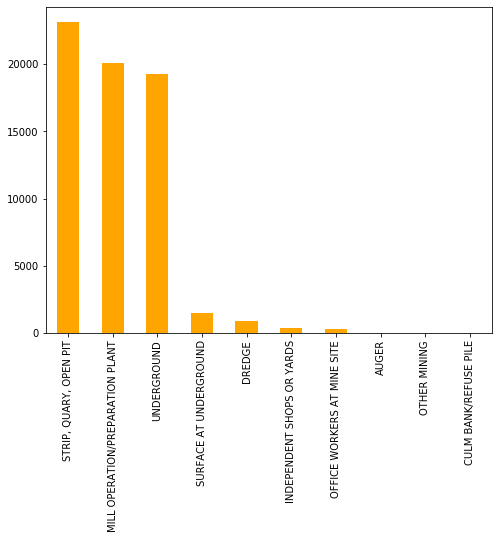

In [85]:
df1.Subunit_Cd_Desc.value_counts().plot(kind='bar',color='orange',figsize=(8,6))

In [101]:
df1.Acc_Classif_Desc.value_counts().head(15)

HANDLING OF MATERIALS                    21166
SLIP OR FALL OF PERSON                   12018
HANDTOOLS (NONPOWERED)                    8451
MACHINERY                                 7468
POWERED HAULAGE                           5013
FALL OF ROOF OR BACK                      2376
OTHER                                     1933
IGNITION OR EXPLOSION OF GAS OR DUST      1240
STEPPING OR KNEELING ON OBJECT            1136
DISORDERS (REPEATED TRAUMA)                872
STRIKING OR BUMPING                        609
ELECTRICAL                                 498
HOISTING                                   492
FALL OF FACE/RIB/PILLAR/SIDE/HIGHWALL      363
FIRE                                       307
Name: Acc_Classif_Desc, dtype: int64

In [56]:
list2 = df1['Acci_Narrative'].to_list()

In [57]:
list2

['Employee was stepping down from the operator platform of a boom truck and twisted his ankle.',
 'Employee noticed pain and swelling in his right wrist after working an extended shift.',
 nan,
 'Employee was climbing into the motor grader when the step broke and he fell onto his back on the ground.',
 'Injured was pushing an insert back into a control knob with his right pinky. His finger rolled forward causing a injury. Injured saw a doc on 9/12/12. Doc put a splint on finger to protect from impact. Injured saw Doc again in two weeks. Doc wanted him to see a surgeon. Injured saw surgeon on 10/12/12. Surgeon recommended out patient surgery. Surgery was performed on 11/5/12.',
 'INJURED WAS REACHING IN AN AWKWARD POSITION. HE EXPERIENCED A SHARP PAIN IN HIS BACK CAUSING HIM TO FALL, INJURING HIS ELBOW AND BACK. COULD POSSIBLY HAVE BEEN AN AGGRAVATION FROM AN OLD BACK INJURY OCCURRING 5/8/97. BECAME REPORTABLE ON 6/21/04 BECAUSE OF LOST TIME.',
 'Employee was attempting to repair an oxy

In [58]:
list3 = df1['Nature_of_Inj_Cd_Desc'].to_list()

In [59]:
from collections import Counter
print(Counter(list3))

Counter({'SPRAIN,STRAIN RUPT DISC': 20604, 'CUT,LACER,PUNCT-OPN WOUND': 12919, 'FRACTURE,CHIP': 7262, 'CONTUSN,BRUISE,INTAC SKIN': 5390, 'MULTIPLE INJURIES': 3619, 'NO VALUE FOUND': 3588, 'UNCLASSIFIED,NOT DETERMED': 1764, 'BURN OR SCALD (HEAT)': 1265, 'DUST IN EYES': 1209, 'BURN,CHEMICL-FUME,COMPOUN': 971, 'CRUSHING': 899, 'SCRATCH,ABRASION,SUPERFCL': 760, 'JOINT,TENDON,MUSCL INFLAM': 603, 'OTHER INJURY,NEC': 553, 'ELECT.ARC BURN-NOT CONTAC': 547, 'HERNIA;RUPTURE': 514, 'HEARING LOSS OR IMPAIRMNT': 510, 'AMPUTATION OR ENUCLEATION': 436, 'POISONING,SYSTEMIC': 381, 'DISLOCATION': 318, 'HEATSTROK,SUNSTR,HT EXHAU': 208, 'HEART ATTACK': 160, 'DERMATITIS,RASH,SKIN INFL': 139, 'CONCUSSION-BRAIN,CEREBRAL': 117, 'ELECT SHOCK,ELECTROCUTION': 107, 'SUFFOC,SMOK INHILAT,DROWN': 99, 330: 81, 'OCCUPATIONAL DISEASES,NEC': 65, 'ELECTRIC BURN-CNTACT BURN': 64, 180: 54, 220: 34, 'PNEUMOCONIOSIS,BLACK LUNG': 29, 'SILICOSIS': 25, 'CEREBRAL HEMORAGE-NT CCUS': 21, 160: 17, 'OTHER PNEUMOCONIOSIS,NEC': 17, 'M

In [60]:
df1.Occup_Cd_Descr.value_counts()

Maintenance man, Mechanic,  Repair/Serviceman, Boilermaker, Fueler, Tire tech, Field service tech          13028
Warehouseman, Bagger, Palletizer/Stacker, Store keeper, Packager, Fabricator, Cleaning plant operator       6437
Laborer, Blacksmith, Bull gang, Parts runner, Roustabout, Pick-up man, Pitman                               5816
NO VALUE FOUND                                                                                              3590
Electrician, Lineman                                                                                        3085
Laborer, Bull gang, Faceman, Parts runner, Roustabout, Roof trimmer/scaler                                  2710
Miner, NEC                                                                                                  2577
Welder (shop)                                                                                               2452
Bulldozer operator, Universal operator, Heavy equipment operator, Operating engineer            

In [62]:
df1.Miner_Activity_Cd_Desc.value_counts()

Handling supplies or material     13420
Machine maintenance                8732
Hand tools (not powered)           6843
Walking, Running                   5703
Getting on or off equipment        4046
NO VALUE FOUND                     3575
Welding or cutting                 1669
Unknown                            1517
Hand load, Hand shoveling          1248
Hand tools (powered)               1175
Haulage or Dump truck              1062
Move non-self-propelled equip      1035
Handling coal, Rock, Ore           1028
Electrical maintenance              811
Climb scaffolds, Ladders            752
Move power cable                    659
Surface equipment, NEC              613
Front-end loader                    611
Inspect equipment or mine           588
Grinding                            506
Idle                                473
Roof bolter, NEC                    443
Handling timber                     441
Mantrip                             399
Clean up - UG only                  398


In [80]:
df1.groupby(['Occup_Cd_Descr','Acc_Classif_Desc'])['Mine_Exp'].mean().reset_index()

,Occup_Cd_Descr,Acc_Classif_Desc,Mine_Exp
0,"Apprentice, Trainee",DISORDERS (PHYSICAL AGENTS),18.420000
1,"Apprentice, Trainee",DISORDERS (REPEATED TRAUMA),7.285000
2,"Apprentice, Trainee",ELECTRICAL,NaN
3,"Apprentice, Trainee",FALL OF FACE/RIB/PILLAR/SIDE/HIGHWALL,0.135000
4,"Apprentice, Trainee",FALL OF ROOF OR BACK,2.346667
5,"Apprentice, Trainee",HANDLING OF MATERIALS,3.721084
6,"Apprentice, Trainee",HANDTOOLS (NONPOWERED),3.841538
7,"Apprentice, Trainee",MACHINERY,5.538148
8,"Apprentice, Trainee",OTHER,0.402857
9,"Apprentice, Trainee",POWERED HAULAGE,1.109130


In [90]:
df1.describe()

,Mine ID,Subunit_Cd,Total_Exp,Mine_Exp,Job_Exp,Unnamed: 58
count,65535.000000,65535.000000,55426.00000,57587.000000,57093.000000,1.0
mean,210539.470832,11.219944,11.03250,8.314111,6.144660,2011.0
std,114396.080350,14.105582,9.57432,8.601643,7.348264,NaN
min,100003.000000,1.000000,0.01000,0.010000,0.010000,2011.0
25%,101322.000000,1.000000,2.53000,1.190000,1.000000,2011.0
50%,200137.000000,3.000000,9.00000,5.150000,3.130000,2011.0
75%,300426.000000,30.000000,17.46000,13.230000,9.000000,2011.0
max,402848.000000,99.000000,81.07000,90.000000,50.960000,2011.0


Text(0.5, 1.0, 'Accidents count by year')

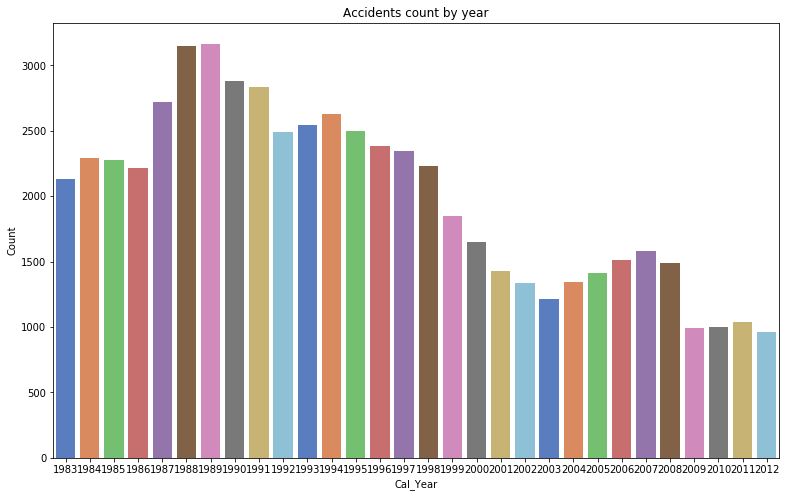

In [98]:
##Accidents by Year
s=df1.groupby('Cal_Year').count()['Acc_Classif_Desc'].head(30)
g=sns.barplot(s.index, s, palette='muted')
g.figure.set_size_inches(13,8)
g.set_ylabel('Count',fontsize=10)
g.set_title("Accidents count by year")


In [104]:
df1.Acc_Type_Cd_Descr.value_counts().head(20)

Struck by... NEC                                                    8470
Over-exertion NEC                                                   8154
Struck by falling object                                            5392
Over-exertion in lifting objects                                    4820
Struck against stationary object                                    4451
Caught in, under or between a moving and a stationary object        4110
Accident type, without injuries                                     3337
Struck by flying object                                             3127
Fall to the walkway or working surface                              2967
Struck against a moving object                                      2618
Caught in, under or between NEC                                     2602
Fall from machine                                                   2365
Fall onto or against objects                                        1963
Over-exertion in pulling or pushing objects        

In [106]:
df1['Deg_ of_Inj_Cd_Desc'].value_counts()

DAYS AWAY FROM WORK ONLY          26845
NO DYS AWY FRM WRK,NO RSTR ACT    20082
DAYS RESTRICTED ACTIVITY ONLY      8710
ACCIDENT ONLY                      3351
DYS AWY FRM WRK & RESTRCTD ACT     3149
OCCUPATNAL ILLNESS NOT DEG 1-6     1416
PERM TOT OR PERM PRTL DISABLTY      800
ALL OTHER CASES (INCL 1ST AID)      465
FATALITY                            255
INJURIES DUE TO NATURAL CAUSES      213
NO VALUE FOUND                      162
INJURIES INVOLVNG NONEMPLOYEES       87
Name: Deg_ of_Inj_Cd_Desc, dtype: int64

In [110]:
df1.Mining_Equip_Cd_Desc.value_counts().head(20)

NO VALUE FOUND                                                           33476
Hand tools (not powered)                                                  8525
Ore haulage trucks - off highway trucks                                   1857
Front-end loader, Tractor-shovel, Payloader, Highlift, Skip loader        1674
Welding machine, Torch, Cutting torch, Arc welder, Air arc                1568
Conveyor, Belt feeder, Stage loader, Hopper shaker, Belt structure        1519
Hand tools (powered)                                                      1423
Trucks, Service truck, Utility truck, Pickup, Water truck, Fuel truck     1175
Continuous miner, Tunnel borer, Road header                               1020
Bulldozer, Dozer, Crawler tractor, Push cat                                910
Shovel, Power shovel, Backhoe, Trackhoe, Dragline - Big Muskie             909
Rock or roof bolting machine, Pinning machine, Truss bolter                868
Machine, NEC - Wheelbarrow, Well drilling Rig, Post 

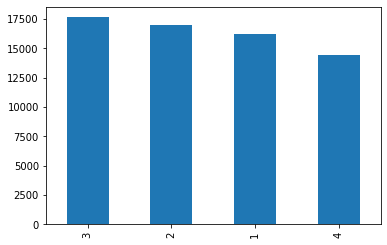

In [122]:
df1.Cal_Quarter.value_counts().head(4).plot(kind='bar')

In [123]:
df1.head()

,Mine ID,Contractor_ID,Subunit_Cd,Subunit_Cd_Desc,Accident_Dt,Deg_ of_Inj_Cd_Desc,Acc_Classif_Desc,Occup_Cd_Descr,Miner_Activity_Cd_Desc,Total_Exp,Mine_Exp,Job_Exp,Acci_Narrative,Controller_ID,Controller_Name,Operator_ID,Operator_Name,Document_Number,Cal_Year,Cal_Quarter,Fiscal_Year,Fiscal_Quar,accident_Time,Deg_of_Injury_Cd,Mining_Equip_Cd,Mining_Equip_Cd_Desc,Equip_Manuf_Cd,Equipment_Manuf_Name,Equip_Manuf_Model_Numb,Shift_Begin_Time,Acc_Classifi_Cd,Acci_Type_Cd,Acc_Type_Cd_Descr,Numb_of_Inj,Occ_Cd,Miner_Act_Cd,Inj_Src_Cd,Injury_Src_Desc,Nature_of_Inj_Cd,Nature_of_Inj_Cd_Desc,Injured_Body_Part_Cd,Inj_Body_Part_Code_Descr,Days_Rest,Days_Lost,Transferred_or_Terminated,Return_to_Work_Dt,Immediately_Notify_Cd,Immediately_Notify_Code_Desc,Investig_Begin_Dt,Closed_Document Number,Coal_Metal_Indicator,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58
0,100003,NaN,30,MILL OPERATION/PREPARATION PLANT,2011-05-10,DAYS RESTRICTED ACTIVITY ONLY,SLIP OR FALL OF PERSON,"Maintenance man, Mechanic, Repair/Serviceman,...",Getting on or off equipment,12.60,12.60,2.23,Employee was stepping down from the operator p...,41044,Lhoist Group,L13586,"Lhoist North America of Alabama, LLC",220113000000,2011,4,2012,1,1530,5,14,"Crane, Cherry picker, Lift basket, Scissor tru...",119,Not on this list,1568,700,18,30,Over-exertion NEC,1,304,23,117,GROUND,330,"SPRAIN,STRAIN RUPT DISC",520,ANKLE,5,0,N,13-10-2011,?,NO VALUE FOUND,NaN,NaN,M,2020-08-29 01:00:21 EDT,2011,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,NaN,30,MILL OPERATION/PREPARATION PLANT,2008-10-03,OCCUPATNAL ILLNESS NOT DEG 1-6,DISORDERS (REPEATED TRAUMA),Pumper,Unknown,2.00,2.00,2.00,Employee noticed pain and swelling in his righ...,41044,Lhoist Group,L13586,"Lhoist North America of Alabama, LLC",220081000000,2008,1,2008,2,1800,7,?,NO VALUE FOUND,?,NO VALUE FOUND,NaN,700,31,30,Over-exertion NEC,1,327,99,127,"MISCELLANEOUS,NEC",270,"JOINT,TENDON,MUSCL INFLAM",320,WRIST,0,0,N,2008-11-03 00:00:00,?,NO VALUE FOUND,NaN,NaN,M,2020-08-29 01:00:21 EDT,2008,NaN,NaN,NaN,NaN,NaN,NaN
2,100003,FW4,30,MILL OPERATION/PREPARATION PLANT,1997-04-08,DAYS AWAY FROM WORK ONLY,POWERED HAULAGE,"Electrician, Lineman",Supervise,0.57,0.57,16.00,NaN,M05293,Chemical Lime Company,L13586,"Lhoist North America of Alabama, LLC",219972000000,1997,3,1997,4,1300,3,71,"Machine, NEC - Wheelbarrow, Well drilling Rig,...",0,Not Reported,?,630,12,5,Struck by flying object,1,302,87,92,PULVERIZED MINERAL (DUST),390,"OTHER INJURY,NEC",130,EYE(S) OPTIC NERVE/VISON,NaN,1,N,1997-06-08 00:00:00,13,NOT MARKED,NaN,NaN,M,2020-08-29 01:00:21 EDT,1997,NaN,NaN,NaN,NaN,NaN,NaN
3,100003,NaN,3,"STRIP, QUARY, OPEN PIT",2008-12-04,DAYS RESTRICTED ACTIVITY ONLY,SLIP OR FALL OF PERSON,"Bulldozer operator, Universal operator, Heavy ...",Getting on or off equipment,37.31,37.31,37.31,Employee was climbing into the motor grader wh...,41044,Lhoist Group,L13586,"Lhoist North America of Alabama, LLC",220081000000,2008,2,2008,3,1100,5,?,NO VALUE FOUND,?,NO VALUE FOUND,NaN,700,18,12,Fall from machine,1,368,23,117,GROUND,160,"CONTUSN,BRUISE,INTAC SKIN",450,SHOULDERS (COLLARBONE/CLAVICLE/SCAPULA),66,0,N,15-07-2008,?,NO VALUE FOUND,NaN,320082000000,M,2020-08-29 01:00:21 EDT,2008,NaN,NaN,NaN,NaN,NaN,NaN
4,100003,NaN,30,MILL OPERATION/PREPARATION PLANT,2012-11-09,DAYS RESTRICTED ACTIVITY ONLY,HANDLING OF MATERIALS,"Electrician, Lineman",Electrical maintenance,5.69,5.69,5.69,Injured was pushing an insert back into a cont...,41044,Lhoist Group,L13586,"Lhoist North America of Alabama, LLC",220123000000,2012,3,2012,4,1455,5,?,NO VALUE FOUND,?,NO VALUE FOUND,NaN,700,9,24,"Caught in, under or between NEC",1,302,20,88,"METAL,NEC(PIPE,WIRE,NAIL)",330,"SPRAIN,STRAIN RUPT DISC",340,FINGER(S)/THUMB,44,0,N,16-01-2013,?,NO VALUE FOUND,NaN,320130000000,M,2020-08-29 01:00:19 EDT,2012,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
df1.pivot_table(index = ['Inj_Body_Part_Code_Descr','Nature_of_Inj_Cd_Desc','Injury_Src_Desc','Occup_Cd_Descr'], values =['Acc_Classif_Desc'],aggfunc = 'count').sort_values(by='Acc_Classif_Desc',ascending=False).head(30)

Acc_Classif_Desc
Inj_Body_Part_Code_Descr             Nature_of_Inj_Cd_Desc     Injury_Src_Desc           Occup_Cd_Descr                                                      
NO VALUE FOUND                       NO VALUE FOUND            NO VALUE FOUND            NO VALUE FOUND                                                  3542
FINGER(S)/THUMB                      CUT,LACER,PUNCT-OPN WOUND METAL,NEC(PIPE,WIRE,NAIL) Maintenance man, Mechanic,  Repair/Serviceman, ...               475
BACK (MUSCLES/SPINE/S-CORD/TAILBONE) SPRAIN,STRAIN RUPT DISC   METAL,NEC(PIPE,WIRE,NAIL) Maintenance man, Mechanic,  Repair/Serviceman, ...               312
EYE(S) OPTIC NERVE/VISON             DUST IN EYES              PULVERIZED MINERAL (DUST) Maintenance man, Mechanic,  Repair/Serviceman, ...               229
                                     CUT,LACER,PUNCT-OPN WOUND METAL,NEC(PIPE,WIRE,NAIL) Maintenance man, Mechanic,  Repair/Serviceman, ...               189
FINGER(S)/THUMB                      FRACTURE,CHIP             METAL,NEC(PIPE,WIRE,NAIL) Maintenance man, Mechanic,  Repair/Serviceman, ...               183
HAND (NOT WRIST OR FINGERS)          CUT,LACER,PUNCT-OPN WOUND METAL,NEC(PIPE,WIRE,NAIL) Maintenance man, Mechanic,  Repair/Serviceman, ...               182
BACK (MUSCLES/SPINE/S-CORD/TAILBONE) SPRAIN,STRAIN RUPT DISC   BAGS                      Warehouseman, Bagger, Palletizer/Stacker, Store...               172
EAR(S) INTERNAL & HEARING            HEARING LOSS OR IMPAIRMNT NOISE,NEC                 Maintenance man, Mechanic,  Repair/Serviceman, ...               160
BACK (MUSCLES/SPINE/S-CORD/TAILBONE) SPRAIN,STRAIN RUPT DISC   HGHWY ORE CARIER,LRGE TRK Haul/Off road/Coal/Ore/Pit/Quarry/Rock/Rubber t...               153
                                                               SURFACE MINING MACHINES   Front-end loader, Scraper-loader operator, Pan ...               139
                                                               BROKEN ROCK,COAL,ORE,WSTE Laborer, Blacksmith, Bull gang, Parts runner, R...               134
KNEE/PATELLA                         SPRAIN,STRAIN RUPT DISC   GROUND                    Maintenance man, Mechanic,  Repair/Serviceman, ...               133
FINGER(S)/THUMB                      CUT,LACER,PUNCT-OPN WOUND METAL COVERS & GUARDS     Maintenance man, Mechanic,  Repair/Serviceman, ...               129
                                                               KNIFE                     Maintenance man, Mechanic,  Repair/Serviceman, ...               127
BACK (MUSCLES/SPINE/S-CORD/TAILBONE) SPRAIN,STRAIN RUPT DISC   SURFACE MINING MACHINES   Bulldozer operator, Universal operator, Heavy e...               119
FINGER(S)/THUMB                      CUT,LACER,PUNCT-OPN WOUND METAL,NEC(PIPE,WIRE,NAIL) Warehouseman, Bagger, Palletizer/Stacker, Store...               118
BACK (MUSCLES/SPINE/S-CORD/TAILBONE) SPRAIN,STRAIN RUPT DISC   METAL COVERS & GUARDS     Maintenance man, Mechanic,  Repair/Serviceman, ...               116
                                                               METAL,NEC(PIPE,WIRE,NAIL) Warehouseman, Bagger, Palletizer/Stacker, Store...               116
                                                               HGHWY ORE CARIER,LRGE TRK Truck driver                                                     110
FINGER(S)/THUMB                      CUT,LACER,PUNCT-OPN WOUND METAL,NEC(PIPE,WIRE,NAIL) Laborer, Blacksmith, Bull gang, Parts runner, R...               110
KNEE/PATELLA                         SPRAIN,STRAIN RUPT DISC   MINE FLOOR,BOTTOM,FOOTWAL Laborer, Bull gang, Faceman, Parts runner, Rous...               102
EYE(S) OPTIC NERVE/VISON             BURN,CHEMICL-FUME,COMPOUN ACIDS,ALKALI,WET CEMENT   Warehouseman, Bagger, Palletizer/Stacker, Store...               102
                                     DUST IN EYES              PULVERIZED MINERAL (DUST) Warehouseman, Bagger, Palletizer/Stacker, Store...                97
BACK (MUSCLES/SPINE/S-CORD/TAILBO